In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import statistics as stat
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("pcse_input.csv")

In [ ]:
random.seed(70)
window_size = 30

for pos, row in data.iterrows():
    back = data['IRRAD'].iloc[pos + 1 : pos + 1 + window_size]
    front = data['IRRAD'].iloc[max(0, pos - window_size) : pos]
    w = front.tolist() + [data['IRRAD'].iloc[pos]] + back.tolist()
    samplerad = np.random.normal(loc=stat.mean(w),scale=stat.stdev(w))
    data.at[pos, 'Noise_IRRAD'] = samplerad

for pos, row in data.iterrows():
    back = data['TMIN'].iloc[pos + 1 : pos + 1 + window_size]
    front = data['TMIN'].iloc[max(0, pos - window_size) : pos]
    w = front.tolist() + [data['TMIN'].iloc[pos]] + back.tolist()
    sampletmin = np.random.normal(loc=stat.mean(w),scale=stat.stdev(w))
    data.at[pos, 'Noise_TMIN'] = sampletmin

for pos, row in data.iterrows():
    back = data['TMAX'].iloc[pos + 1 : pos + 1 + window_size]
    front = data['TMAX'].iloc[max(0, pos - window_size) : pos]
    w = front.tolist() + [data['TMAX'].iloc[pos]] + back.tolist()
    sampletmax = np.random.normal(loc=stat.mean(w),scale=stat.stdev(w))
    data.at[pos, 'Noise_TMAX'] = sampletmax

for pos, row in data.iterrows():
    back = data['VAP'].iloc[pos + 1 : pos + 1 + window_size]
    front = data['VAP'].iloc[max(0, pos - window_size) : pos]
    w = front.tolist() + [data['VAP'].iloc[pos]] + back.tolist()
    samplevap = np.random.normal(loc=stat.mean(w),scale=stat.stdev(w))
    data.at[pos, 'Noise_VAP'] = samplevap

for pos, row in data.iterrows():
    back = data['WIND'].iloc[pos + 1 : pos + 1 + window_size]
    front = data['WIND'].iloc[max(0, pos - window_size) : pos]
    w = front.tolist() + [data['WIND'].iloc[pos]] + back.tolist()
    samplewind= np.random.normal(loc=stat.mean(w),scale=stat.stdev(w))
    data.at[pos, 'Noise_WIND'] = samplewind

for pos, row in data.iterrows():
    back = data['RAIN'].iloc[pos + 1 : pos + 1 + window_size]
    front = data['RAIN'].iloc[max(0, pos - window_size) : pos]
    w = front.tolist() + [data['RAIN'].iloc[pos]] + back.tolist()
    samplerain = np.random.normal(loc=stat.mean(w),scale=stat.stdev(w))
    data.at[pos, 'Noise_RAIN'] = samplerain

In [ ]:
#since vapour cannot be less than 0.06 as expected by WOFOST
def f(x):
    if x <= 0.06:
        return 0.07
    return x

data['noisevap'] = data['Noise_VAP'].apply(f)

data["SNOWDEPTH"] = -999
dfnoise = data[["DAY", "Noise_IRRAD", "Noise_TMIN", "Noise_TMAX", "noisevap", "Noise_WIND", "Noise_RAIN", "SNOWDEPTH"]]
dfnoise = dfnoise.rename(columns = {"Noise_IRRAD" : "IRRAD", "Noise_TMIN" : "TMIN", "Noise_TMAX": "TMAX", "noisevap" : "VAP",
                                   "Noise_WIND":"WIND", "Noise_RAIN" : "RAIN"})

#changed to absolute value because negative values are not accepted in pcse
dfnoise["IRRAD"] = dfnoise["IRRAD"].abs()
dfnoise["TMIN"] = dfnoise["TMIN"].abs()
dfnoise["TMAX"] = dfnoise["TMAX"].abs()
dfnoise["VAP"] = dfnoise["VAP"].abs()
dfnoise["WIND"] = dfnoise["WIND"].abs()
dfnoise["RAIN"] = dfnoise["RAIN"].abs()
dfnoise["DAY"] = pd.to_datetime(dfnoise["DAY"])
dfnoise['DAY'] = dfnoise['DAY'].dt.date

dfnoise["IRRAD"] = dfnoise["IRRAD"].astype(str)
dfnoise["TMIN"] = dfnoise["TMIN"].astype(str)
dfnoise["TMAX"] = dfnoise["TMAX"].astype(str)
dfnoise["VAP"] = dfnoise["VAP"].astype(str)
dfnoise["WIND"] = dfnoise["WIND"].astype(str)
dfnoise["RAIN"] = dfnoise["RAIN"].astype(str)
dfnoise["SNOWDEPTH"] = dfnoise["SNOWDEPTH"].astype(str)

<ipython-input-6-b8c26d10d9e8>:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dfnoise["DAY"] = pd.to_datetime(dfnoise["DAY"])


In [ ]:
dfnoise.set_index("DAY")

,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH
DAY,,,,,,,
2042-01-01,19.50431678344657,8.127731596482784,12.685543386032649,0.07286222263055431,10.256112876128041,11.749057616932344,-999
2042-02-01,31.63431875210992,10.205096714869965,11.304909263645392,0.07,12.706983491587636,8.646345125578968,-999
2042-03-01,32.60763722815571,8.486333415615688,12.065293000361327,0.0681811664636767,14.632986471525811,14.198413652507263,-999
2042-04-01,38.19863895710077,6.692964814401552,9.65854809812279,0.06742295184904111,3.311196601330316,5.54523507737561,-999
2042-05-01,34.60397102225484,7.547735976165736,10.940130897527546,0.06939921024518374,11.852614746265006,11.700810303095452,-999
...,...,...,...,...,...,...,...
2047-12-27,37.276914987606595,6.411578847816409,9.857384488354265,0.07,11.026573279390444,8.830954270186027,-999
2047-12-28,31.96762091334044,8.140142031762686,12.822476033583316,0.3262394579036523,1.7553818266633519,4.196245502991777,-999
2047-12-29,25.11630839436524,6.784569811680809,10.448028095340117,0.356543292298353,1.9111651380970667,5.2344493886589385,-999


In [ ]:
dfnoise.to_excel("sample83.xlsx", index=False)

Every sample generated is converted to the weatherdata provider

In [ ]:
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider("sample83.xlsx")
print(wdp)

Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: United Kingdom
Station: Cornwall
Description: Observed data from ceda
Source: Meteorology and Air Quality Group
Contact: Peter Uithol
----Site characteristics----
Elevation:    4.2
Latitude:  50.090
Longitude: -5.670
Data available for 2042-01-01 - 2047-12-31
Number of missing days: 0



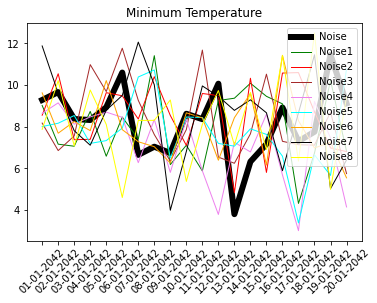

In [ ]:
plt.xticks(rotation=45)
dd = pd.read_excel("Noise21.xlsx")
dd = dd[0:20]
dd11 = pd.read_excel("Noise22.xlsx")
dd11 = dd11[0:20]
dd22 = pd.read_excel("Noise23.xlsx")
dd22 = dd22[0:20]
dd33 = pd.read_excel("Noise24.xlsx")
dd33 = dd33[0:20]
dd44 = pd.read_excel("Noise25.xlsx")
dd44 = dd44[0:20]
dd55 = pd.read_excel("Noise26.xlsx")
dd55 = dd55[0:20]
dd66 = pd.read_excel("Noise27.xlsx")
dd66 = dd66[0:20]
dd77 = pd.read_excel("Noise28.xlsx")
dd77 = dd77[0:20]
dd88 = pd.read_excel("Noise29.xlsx")
dd88 = dd88[0:20]


plt.title("Minimum Temperature")
# plt.plot(data['DAY'], data['Noise_TMIN'], label="OBS", color = "black", linewidth=6)
plt.plot(dd['DAY'], dd['Noise_TMIN'], label="Noise1", color = "black", linewidth=1)
plt.plot(dd11['DAY'], dd11['Noise_TMIN'], label="Noise2",color="green", linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_TMIN'], label="Noise3", color="Red", linewidth=1)

plt.plot(dd33['DAY'], dd33['Noise_TMIN'], label="Noise4", color = "brown",linewidth=1)
plt.plot(dd44['DAY'], dd44['Noise_TMIN'], label="Noise5",color="violet", linewidth=1)
plt.plot(dd55['DAY'], dd55['Noise_TMIN'], label="Noise6", color="cyan", linewidth=1)

plt.plot(dd66['DAY'], dd66['Noise_TMIN'], label="Noise7", color="orange", linewidth=1)
plt.plot(dd77['DAY'], dd77['Noise_TMIN'], label="Noise8",color="black", linewidth=1)
plt.plot(dd88['DAY'], dd88['Noise_TMIN'], label="Noise9", color="yellow", linewidth=1)


# plt.plot(dd11['DAY'], dd11['Noise_TMIN'], label="Noise1",color="green", linewidth=1)
# plt.plot(dd22['DAY'], dd22['Noise_TMIN'], label="Noise2", color="Red", linewidth=1)

plt.legend()

In [ ]:
dd21 = pd.read_excel("Noise21.xlsx")
dd21 = dd21[0:20]
dd22 = pd.read_excel("Noise22.xlsx")
dd22 = dd22[0:20]
dd23 = pd.read_excel("Noise23.xlsx")
dd23 = dd23[0:20]
dd24 = pd.read_excel("Noise24.xlsx")
dd24 = dd24[0:20]
dd25 = pd.read_excel("Noise25.xlsx")
dd25 = dd25[0:20]
dd26 = pd.read_excel("Noise26.xlsx")
dd26 = dd26[0:20]
dd27 = pd.read_excel("Noise27.xlsx")
dd27 = dd27[0:20]
dd28 = pd.read_excel("Noise28.xlsx")
dd28 = dd28[0:20]
dd29 = pd.read_excel("Noise29.xlsx")
dd29 = dd29[0:20]



dd = pd.read_excel("Noise11.xlsx")
dd = dd[0:20]
dd11 = pd.read_excel("Noise12.xlsx")
dd11 = dd11[0:20]
dd22 = pd.read_excel("Noise13.xlsx")
dd22 = dd22[0:20]
dd33 = pd.read_excel("Noise14.xlsx")
dd33 = dd33[0:20]
dd44 = pd.read_excel("Noise15.xlsx")
dd44 = dd44[0:20]
dd55 = pd.read_excel("Noise16.xlsx")
dd55 = dd55[0:20]
dd66 = pd.read_excel("Noise17.xlsx")
dd66 = dd66[0:20]
dd77 = pd.read_excel("Noise18.xlsx")
dd77 = dd77[0:20]
dd88 = pd.read_excel("Noise19.xlsx")
dd88 = dd88[0:20]

dd99 = pd.read_excel("Noise30.xlsx")
dd99 = dd99[0:20]

dd111 = pd.read_excel("Noise10.xlsx")
dd111 = dd111[0:20]


In [ ]:
data=data[0:20]

# Minimum Temperature

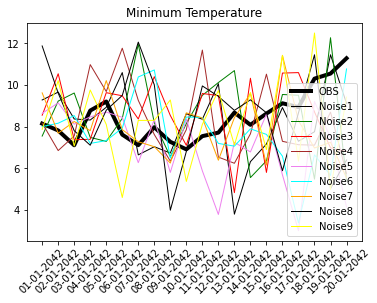

In [ ]:
plt.xticks(rotation=45)
plt.title("Minimum Temperature")
plt.plot(data['DAY'], data['TMIN'], label="OBS", color = "black", linewidth=4)
plt.plot(dd21['DAY'], dd21['Noise_TMIN'], label="Noise1", color = "black", linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_TMIN'], label="Noise2",color="green", linewidth=1)
plt.plot(dd23['DAY'], dd23['Noise_TMIN'], label="Noise3", color="Red", linewidth=1)

plt.plot(dd24['DAY'], dd24['Noise_TMIN'], label="Noise4", color = "brown",linewidth=1)
plt.plot(dd25['DAY'], dd25['Noise_TMIN'], label="Noise5",color="violet", linewidth=1)
plt.plot(dd26['DAY'], dd26['Noise_TMIN'], label="Noise6", color="cyan", linewidth=1)

plt.plot(dd27['DAY'], dd27['Noise_TMIN'], label="Noise7", color="orange", linewidth=1)
plt.plot(dd28['DAY'], dd28['Noise_TMIN'], label="Noise8",color="black", linewidth=1)
plt.plot(dd29['DAY'], dd29['Noise_TMIN'], label="Noise9", color="yellow", linewidth=1)



plt.legend()

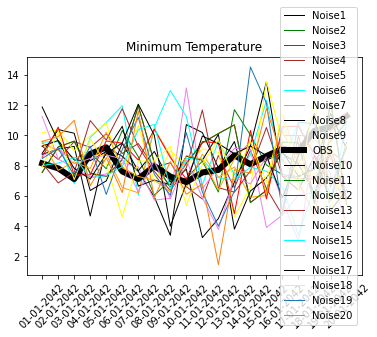

In [ ]:
plt.xticks(rotation=45)

plt.title("Minimum Temperature")

plt.plot(dd['DAY'], dd['Noise_TMIN'], label="Noise1", color = "black", linewidth=1)
plt.plot(dd11['DAY'], dd11['Noise_TMIN'], label="Noise2",color="green", linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_TMIN'], label="Noise3", color="Red", linewidth=1)

plt.plot(dd33['DAY'], dd33['Noise_TMIN'], label="Noise4", color = "brown",linewidth=1)
plt.plot(dd44['DAY'], dd44['Noise_TMIN'], label="Noise5",color="violet", linewidth=1)
plt.plot(dd55['DAY'], dd55['Noise_TMIN'], label="Noise6", color="cyan", linewidth=1)

plt.plot(dd66['DAY'], dd66['Noise_TMIN'], label="Noise7", color="orange", linewidth=1)
plt.plot(dd77['DAY'], dd77['Noise_TMIN'], label="Noise8",color="black", linewidth=1)
plt.plot(dd88['DAY'], dd88['Noise_TMIN'], label="Noise9", color="yellow", linewidth=1)


plt.plot(data['DAY'], data['TMIN'], label="OBS", color = "black", linewidth=6)
plt.plot(dd21['DAY'], dd21['Noise_TMIN'], label="Noise10", color = "black", linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_TMIN'], label="Noise11",color="green", linewidth=1)
plt.plot(dd23['DAY'], dd23['Noise_TMIN'], label="Noise12", color="Red", linewidth=1)

plt.plot(dd24['DAY'], dd24['Noise_TMIN'], label="Noise13", color = "brown",linewidth=1)
plt.plot(dd25['DAY'], dd25['Noise_TMIN'], label="Noise14",color="violet", linewidth=1)
plt.plot(dd26['DAY'], dd26['Noise_TMIN'], label="Noise15", color="cyan", linewidth=1)

plt.plot(dd27['DAY'], dd27['Noise_TMIN'], label="Noise16", color="orange", linewidth=1)
plt.plot(dd28['DAY'], dd28['Noise_TMIN'], label="Noise17",color="black", linewidth=1)
plt.plot(dd29['DAY'], dd29['Noise_TMIN'], label="Noise18", color="yellow", linewidth=1)

plt.plot(dd99['DAY'], dd99['Noise_TMIN'], label="Noise19", linewidth=1)
plt.plot(dd111['DAY'], dd111['Noise_TMIN'], label="Noise20", linewidth=1)


plt.legend(loc = 5)
plt.show()

# Maximum Temperature

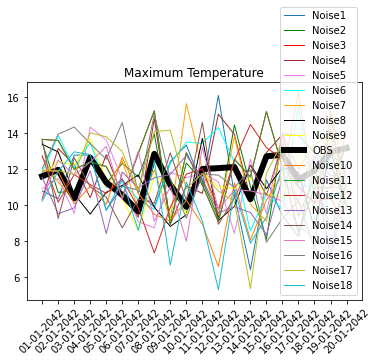

In [ ]:
plt.xticks(rotation=45)


plt.title("Maximum Temperature")

plt.plot(dd['DAY'], dd['Noise_TMAX'], label="Noise1",  linewidth=1)
plt.plot(dd11['DAY'], dd11['Noise_TMAX'], label="Noise2",color="green", linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_TMAX'], label="Noise3", color="Red", linewidth=1)

plt.plot(dd33['DAY'], dd33['Noise_TMAX'], label="Noise4", color = "brown",linewidth=1)
plt.plot(dd44['DAY'], dd44['Noise_TMAX'], label="Noise5",color="violet", linewidth=1)
plt.plot(dd55['DAY'], dd55['Noise_TMAX'], label="Noise6", color="cyan", linewidth=1)

plt.plot(dd66['DAY'], dd66['Noise_TMAX'], label="Noise7", color="orange", linewidth=1)
plt.plot(dd77['DAY'], dd77['Noise_TMAX'], label="Noise8",color="black", linewidth=1)
plt.plot(dd88['DAY'], dd88['Noise_TMAX'], label="Noise9", color="yellow", linewidth=1)


plt.plot(data['DAY'], data['TMAX'], label="OBS", color = "black", linewidth=6)
plt.plot(dd21['DAY'], dd21['Noise_TMAX'], label="Noise10",  linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_TMAX'], label="Noise11",  linewidth=1)
plt.plot(dd23['DAY'], dd23['Noise_TMAX'], label="Noise12",  linewidth=1)

plt.plot(dd24['DAY'], dd24['Noise_TMAX'], label="Noise13",linewidth=1)
plt.plot(dd25['DAY'], dd25['Noise_TMAX'], label="Noise14",linewidth=1)
plt.plot(dd26['DAY'], dd26['Noise_TMAX'], label="Noise15",linewidth=1)

plt.plot(dd27['DAY'], dd27['Noise_TMAX'], label="Noise16",linewidth=1)
plt.plot(dd28['DAY'], dd28['Noise_TMAX'], label="Noise17",linewidth=1)
plt.plot(dd29['DAY'], dd29['Noise_TMAX'], label="Noise18",linewidth=1)


plt.legend(loc = 4)

# Radiation

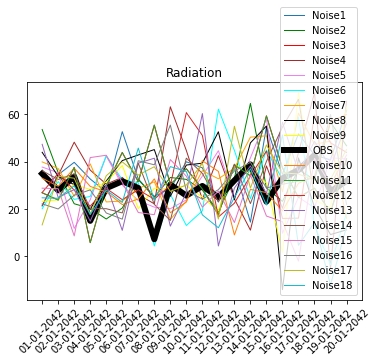

In [ ]:
plt.xticks(rotation=45)


plt.title("Radiation")

plt.plot(dd['DAY'], dd['Noise_IRRAD'], label="Noise1",  linewidth=1)
plt.plot(dd11['DAY'], dd11['Noise_IRRAD'], label="Noise2",color="green", linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_IRRAD'], label="Noise3", color="Red", linewidth=1)

plt.plot(dd33['DAY'], dd33['Noise_IRRAD'], label="Noise4", color = "brown",linewidth=1)
plt.plot(dd44['DAY'], dd44['Noise_IRRAD'], label="Noise5",color="violet", linewidth=1)
plt.plot(dd55['DAY'], dd55['Noise_IRRAD'], label="Noise6", color="cyan", linewidth=1)

plt.plot(dd66['DAY'], dd66['Noise_IRRAD'], label="Noise7", color="orange", linewidth=1)
plt.plot(dd77['DAY'], dd77['Noise_IRRAD'], label="Noise8",color="black", linewidth=1)
plt.plot(dd88['DAY'], dd88['Noise_IRRAD'], label="Noise9", color="yellow", linewidth=1)


plt.plot(data['DAY'], data['IRRAD'], label="OBS", color = "black", linewidth=6)
plt.plot(dd21['DAY'], dd21['Noise_IRRAD'], label="Noise10",  linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_IRRAD'], label="Noise11",  linewidth=1)
plt.plot(dd23['DAY'], dd23['Noise_IRRAD'], label="Noise12",  linewidth=1)

plt.plot(dd24['DAY'], dd24['Noise_IRRAD'], label="Noise13",linewidth=1)
plt.plot(dd25['DAY'], dd25['Noise_IRRAD'], label="Noise14",linewidth=1)
plt.plot(dd26['DAY'], dd26['Noise_IRRAD'], label="Noise15",linewidth=1)

plt.plot(dd27['DAY'], dd27['Noise_IRRAD'], label="Noise16",linewidth=1)
plt.plot(dd28['DAY'], dd28['Noise_IRRAD'], label="Noise17",linewidth=1)
plt.plot(dd29['DAY'], dd29['Noise_IRRAD'], label="Noise18",linewidth=1)




plt.legend(loc = 4)

# VAPOUR/Humidity

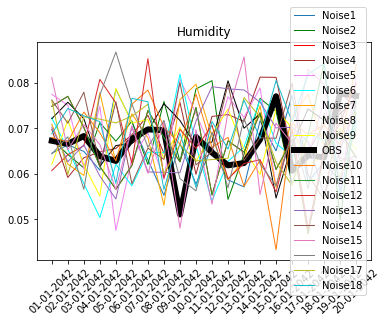

In [ ]:
plt.xticks(rotation=45)


plt.title("Humidity")

plt.plot(dd['DAY'], dd['Noise_VAP'], label="Noise1",  linewidth=1)
plt.plot(dd11['DAY'], dd11['Noise_VAP'], label="Noise2",color="green", linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_VAP'], label="Noise3", color="Red", linewidth=1)

plt.plot(dd33['DAY'], dd33['Noise_VAP'], label="Noise4", color = "brown",linewidth=1)
plt.plot(dd44['DAY'], dd44['Noise_VAP'], label="Noise5",color="violet", linewidth=1)
plt.plot(dd55['DAY'], dd55['Noise_VAP'], label="Noise6", color="cyan", linewidth=1)

plt.plot(dd66['DAY'], dd66['Noise_VAP'], label="Noise7", color="orange", linewidth=1)
plt.plot(dd77['DAY'], dd77['Noise_VAP'], label="Noise8",color="black", linewidth=1)
plt.plot(dd88['DAY'], dd88['Noise_VAP'], label="Noise9", color="yellow", linewidth=1)


plt.plot(data['DAY'], data['VAP'], label="OBS", color = "black", linewidth=6)
plt.plot(dd21['DAY'], dd21['Noise_VAP'], label="Noise10",  linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_VAP'], label="Noise11",  linewidth=1)
plt.plot(dd23['DAY'], dd23['Noise_VAP'], label="Noise12",  linewidth=1)

plt.plot(dd24['DAY'], dd24['Noise_VAP'], label="Noise13",linewidth=1)
plt.plot(dd25['DAY'], dd25['Noise_VAP'], label="Noise14",linewidth=1)
plt.plot(dd26['DAY'], dd26['Noise_VAP'], label="Noise15",linewidth=1)

plt.plot(dd27['DAY'], dd27['Noise_VAP'], label="Noise16",linewidth=1)
plt.plot(dd28['DAY'], dd28['Noise_VAP'], label="Noise17",linewidth=1)
plt.plot(dd29['DAY'], dd29['Noise_VAP'], label="Noise18",linewidth=1)


plt.legend(loc = 5)

# Rain

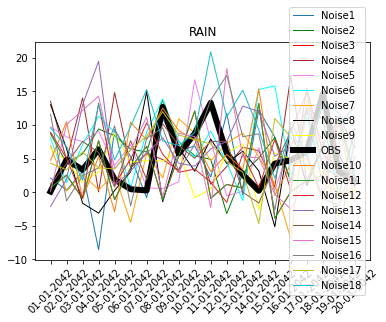

In [ ]:
plt.xticks(rotation=45)


plt.title("RAIN")

plt.plot(dd['DAY'], dd['Noise_RAIN'], label="Noise1",  linewidth=1)
plt.plot(dd11['DAY'], dd11['Noise_RAIN'], label="Noise2",color="green", linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_RAIN'], label="Noise3", color="Red", linewidth=1)

plt.plot(dd33['DAY'], dd33['Noise_RAIN'], label="Noise4", color = "brown",linewidth=1)
plt.plot(dd44['DAY'], dd44['Noise_RAIN'], label="Noise5",color="violet", linewidth=1)
plt.plot(dd55['DAY'], dd55['Noise_RAIN'], label="Noise6", color="cyan", linewidth=1)

plt.plot(dd66['DAY'], dd66['Noise_RAIN'], label="Noise7", color="orange", linewidth=1)
plt.plot(dd77['DAY'], dd77['Noise_RAIN'], label="Noise8",color="black", linewidth=1)
plt.plot(dd88['DAY'], dd88['Noise_RAIN'], label="Noise9", color="yellow", linewidth=1)


plt.plot(data['DAY'], data['RAIN'], label="OBS", color = "black", linewidth=6)
plt.plot(dd21['DAY'], dd21['Noise_RAIN'], label="Noise10",  linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_RAIN'], label="Noise11",  linewidth=1)
plt.plot(dd23['DAY'], dd23['Noise_RAIN'], label="Noise12",  linewidth=1)

plt.plot(dd24['DAY'], dd24['Noise_RAIN'], label="Noise13",linewidth=1)
plt.plot(dd25['DAY'], dd25['Noise_RAIN'], label="Noise14",linewidth=1)
plt.plot(dd26['DAY'], dd26['Noise_RAIN'], label="Noise15",linewidth=1)

plt.plot(dd27['DAY'], dd27['Noise_RAIN'], label="Noise16",linewidth=1)
plt.plot(dd28['DAY'], dd28['Noise_RAIN'], label="Noise17",linewidth=1)
plt.plot(dd29['DAY'], dd29['Noise_RAIN'], label="Noise18",linewidth=1)


plt.legend(loc = 5)

# WIND

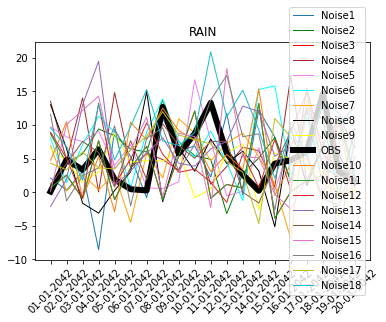

In [ ]:
plt.xticks(rotation=45)


plt.title("RAIN")

plt.plot(dd['DAY'], dd['Noise_RAIN'], label="Noise1",  linewidth=1)
plt.plot(dd11['DAY'], dd11['Noise_RAIN'], label="Noise2",color="green", linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_RAIN'], label="Noise3", color="Red", linewidth=1)

plt.plot(dd33['DAY'], dd33['Noise_RAIN'], label="Noise4", color = "brown",linewidth=1)
plt.plot(dd44['DAY'], dd44['Noise_RAIN'], label="Noise5",color="violet", linewidth=1)
plt.plot(dd55['DAY'], dd55['Noise_RAIN'], label="Noise6", color="cyan", linewidth=1)

plt.plot(dd66['DAY'], dd66['Noise_RAIN'], label="Noise7", color="orange", linewidth=1)
plt.plot(dd77['DAY'], dd77['Noise_RAIN'], label="Noise8",color="black", linewidth=1)
plt.plot(dd88['DAY'], dd88['Noise_RAIN'], label="Noise9", color="yellow", linewidth=1)




plt.plot(data['DAY'], data['RAIN'], label="OBS", color = "black", linewidth=6)
plt.plot(dd21['DAY'], dd21['Noise_RAIN'], label="Noise10",  linewidth=1)
plt.plot(dd22['DAY'], dd22['Noise_RAIN'], label="Noise11",  linewidth=1)
plt.plot(dd23['DAY'], dd23['Noise_RAIN'], label="Noise12",  linewidth=1)

plt.plot(dd24['DAY'], dd24['Noise_RAIN'], label="Noise13",linewidth=1)
plt.plot(dd25['DAY'], dd25['Noise_RAIN'], label="Noise14",linewidth=1)
plt.plot(dd26['DAY'], dd26['Noise_RAIN'], label="Noise15",linewidth=1)

plt.plot(dd27['DAY'], dd27['Noise_RAIN'], label="Noise16",linewidth=1)
plt.plot(dd28['DAY'], dd28['Noise_RAIN'], label="Noise17",linewidth=1)
plt.plot(dd29['DAY'], dd29['Noise_RAIN'], label="Noise18",linewidth=1)


plt.legend(loc = 5)